# Prosper Loan Data Exploration
## by Emma Hungrige


## Preliminary Wrangling
This data set contains information on peer to peer loans facilitated by the credit company, Prosper.

In [74]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

%config InlineBbackend.figure_format = "retina"

In [75]:
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [77]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [78]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2245,041F3430145017632AA8BA0,390137,2008-08-29 05:07:43.680000000,B,36,Completed,2011-09-09 00:00:00,0.17193,0.1575,0.1475,...,-57.94,0.00,0.0,0.0,0.0,1.0,0,0,0.0,108
75013,40F535908073254938858BC,912400,2013-09-19 13:39:32.590000000,NaN,36,Current,NaN,0.14409,0.1159,0.1059,...,-35.93,0.00,0.0,0.0,0.0,1.0,0,0,0.0,90
46273,8D0C3530238955853B93AA2,534978,2011-10-23 14:07:59.283000000,NaN,36,Completed,2012-06-15 00:00:00,0.20200,0.1799,0.1699,...,-14.74,0.00,0.0,0.0,0.0,1.0,0,0,0.0,20
102988,35113586293088828096405,859552,2013-08-03 10:46:43.993000000,NaN,60,Current,NaN,0.27637,0.2506,0.2406,...,-19.73,0.00,0.0,0.0,0.0,1.0,0,0,0.0,2
64366,91083586611460835DA94F3,862308,2013-08-07 03:22:49.683000000,NaN,60,Current,NaN,0.13942,0.1169,0.1069,...,-73.25,0.00,0.0,0.0,0.0,1.0,0,0,0.0,274
33939,B8663596881629915202A61,1100583,2013-12-20 11:02:19.417000000,NaN,60,Current,NaN,0.20040,0.1765,0.1665,...,-16.90,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
77865,9DA635461878864198A8F59,588062,2012-05-10 12:40:01.903000000,NaN,36,Past Due (1-15 days),NaN,0.35797,0.3177,0.3077,...,-47.68,-147.65,0.0,0.0,0.0,1.0,0,0,0.0,13
1379,7B22358909824432888A960,913677,2013-09-20 09:47:04.787000000,NaN,60,Current,NaN,0.21115,0.1870,0.1770,...,-41.04,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
58245,BC6A3557201311989982118,634327,2012-09-05 12:37:31.397000000,NaN,36,Completed,2013-10-10 00:00:00,0.27060,0.2324,0.2224,...,-17.18,0.00,0.0,0.0,0.0,1.0,0,0,0.0,29
27156,01793403613525474C385A5,228220,2007-11-08 04:22:35.990000000,D,36,Completed,2008-05-16 00:00:00,0.22868,0.2100,0.2000,...,-4.78,0.00,0.0,0.0,0.0,1.0,0,0,0.0,14


### What is/are the main feature(s) of interest in your dataset?

We're most interested in figuring out which borrower features are best for predicting the highest rate of return and what factors will have the highest impact on the chances of default. We also want to investigate how closely the estimated loan performance matches the actual loan performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are over 81 columns to use in this dataset, but we believe the following columns will have the largest effect on the performance of the loans:

1. **IncomeRange** - The income range of the borrower at the time the listing was created
2. **DebtToIncomeRatio** - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned at 1001%).
3. **CreditGrade** - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4. **ProsperRating (Alpha)** - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

The performance of the loan can be determined by the following features:

1. **EstimatedReturn** - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009. This is on an annual percentage rate (APR).
2. **ActualReturn** - To see how well the loan performed verses the EstimatedReturn. We will calculate this feature based on how Prosper calculates their Annualized Net Returns.

## Univariate Exploration

### Estimated Return

In [79]:
# Setting color
base_color = sns.color_palette()[0]

In [80]:
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

There appears to be quite a few empty cells as the total number of rows is over 10k.

The range of estimated returns is -18% to 28%.

I expect to see a heavily right skewed distribution plot based on the quartile distribution.

Let's drop the null rows and create a histogram plot.

In [81]:
#Drop null rows without an estimated return
df.EstimatedReturn.dropna(axis = 0, inplace = True)

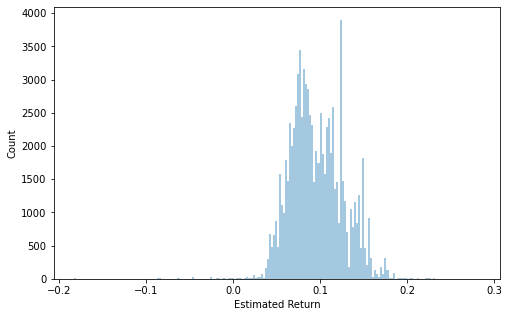

In [82]:
#Histogram plot
plt.figure(figsize = [8, 5])
sns.distplot(df.EstimatedReturn, kde = False, bins = 200, color = base_color)
plt.xlabel("Estimated Return")
plt.ylabel("Count");

It appears most of our loans have an estimated return between 0% and 20%. An additional histogram shall be created to zoom in a little further.

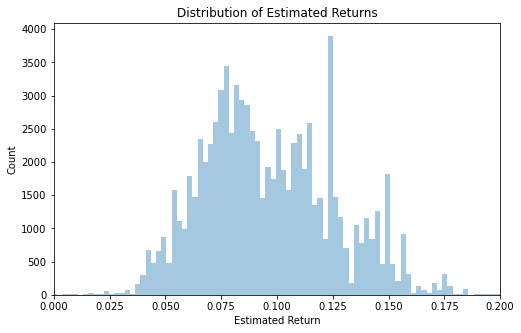

In [83]:
#Zoom in on histogram

plt.figure(figsize = [8,5])
sns.distplot(df.EstimatedReturn, kde = False, bins = 200, color = base_color)
plt.xlim(0, .2)
plt.xlabel("Estimated Return")
plt.ylabel("Count")
plt.title("Distribution of Estimated Returns");

It appears like the assumption that this data would be right skewed is correct.

It also looks like there are a few peaks in some standard values like 5%, 7.5%, and 15%. Most interestingly, the largest bin falls right around 12.5%.

### Actual Returns

This section appears to be quite nuanced and required some engineering. We're going to calculate the actual returns by using the remaining loan performance (LP) variables.

**NOTE:** To simplify out calculation for exploratory purposes, we will only divide by the original loan amount. Otherwise, we'll run into other categorical issues if we try to determine the current rate of return for current loans vs completed loans. This section may be revisited later to refine the actual returns.

In [84]:
#Simplified actual return formula
df["ActualReturns"] = df.LP_CustomerPayments - df.LoanOriginalAmount - (df.LP_ServiceFees + df.LP_CollectionFees + df.LP_NetPrincipalLoss)
df["ActualReturns"] = 1 + (df.ActualReturns / df.LoanOriginalAmount)

In [85]:
df.ActualReturns.describe()

count    113937.000000
mean          0.531620
std           0.621164
min          -1.000650
25%           0.074989
50%           0.415864
75%           1.119834
max           2.602880
Name: ActualReturns, dtype: float64

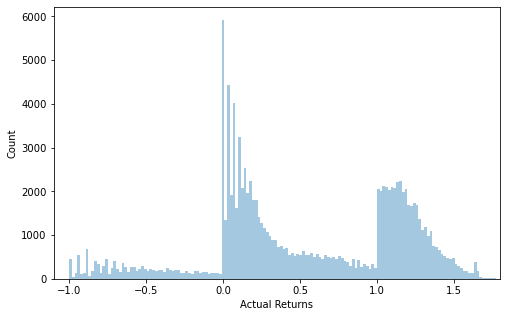

In [86]:
#Plot distribution
plt.figure(figsize = [8,5])
sns.distplot(df.ActualReturns, kde = False, bins = 200, color = base_color)
plt.xlim(-1.1, 1.8)
plt.xlabel("Actual Returns")
plt.ylabel("Count");

It's interesting to see there are some loans where it appears that the borrower never made a payment which gives us the minimum of losing 100% of the investment. On the other end of the spectrum, it looks like most loans drop off after about 170% of the original loan amount.

As mentioned previously, to simplify the visualization, this calculation is not annualized based on the length of the loans, so this is not quite an apples to apples comparison with the estimated return which is annualized.

Since there appears to be differnt modes to the distribution, let's see how the actual returns differ by the loan status:

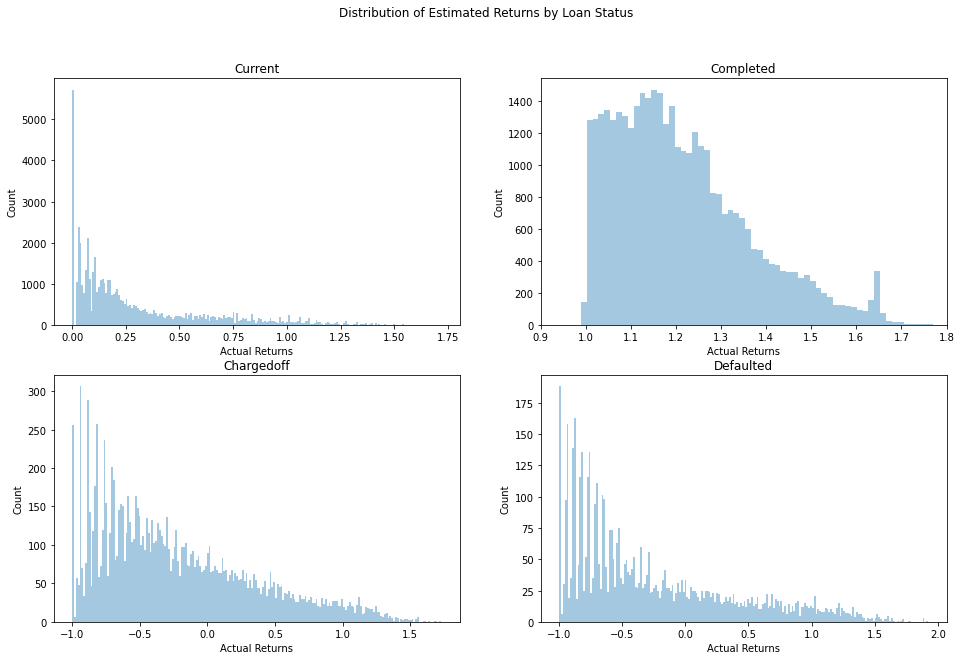

In [87]:
#Multiplot for loan status

variables = ["Current", "Completed", "Chargedoff", "Defaulted"]

plt.figure(figsize = [16, 10])

# loop through variables list
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sns.distplot(df.query('LoanStatus == "{}"'.format(variables[i])).ActualReturns, 
                 kde = False, bins = 200, color = base_color)
    
    plt.xlabel('Actual Returns')
    plt.ylabel('Count')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(.9, 1.8)

plt.suptitle('Distribution of Estimated Returns by Loan Status');

For the current loans, there appears to be a large number of loans that have an actual return value of 0. This could mean that "Current" also takes into account all the loans that have not been fully funded yet. We would have to explore this further to extract loans that have been fully funded.

Since our actual returns feature is not annualized, we see that for the loan terms of 3-5 years, an investor could see a total return of 170%.

For loans that have defaulted or have been chargedoff, it makes sense that a majority of them show negative returns up to 100%. Meaning that the borrower could have never made a payment or the service/collection fees resulted in the investor losing their entire principal. Of course this is the worst case scenario.

### Prosper Credit Grade

Now that we have a high level overview of what the returns on the platform looks like, let's investigate if there is a similar distribution for the borrower's prosper/credit grade.

In [88]:
df['ProsperRating (Alpha)'].describe(), df['ProsperRating (Alpha)'].value_counts()

(count     84853
 unique        7
 top           C
 freq      18345
 Name: ProsperRating (Alpha), dtype: object,
 C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64)

In [89]:
df['CreditGrade'].describe(), df['CreditGrade'].value_counts()

(count     28953
 unique        8
 top           C
 freq       5649
 Name: CreditGrade, dtype: object,
 C     5649
 D     5153
 B     4389
 AA    3509
 HR    3508
 A     3315
 E     3289
 NC     141
 Name: CreditGrade, dtype: int64)

From the feature descriptions, it looks like Prosper transitioned to a "Prosper Rating" after 2009 to differentiate themselves from the industry standard "Credit Grade.

For exploratory purposes, we'll replace the Credit Grade of No Credit (NC) with High Risk (HR) and combine this column with the Prosper Rating.

In the future we may want to look at estimated returns of the pre-2009 "Credit Grade" to see how it compares with the post-2009 "Prosper Rating" to validate if they truly are equivalent or if Prosper skewed their credit rating in some way.

In [90]:
#Replace NC with HR
df["CreditGrade"].replace(["NC", "HR"], "E", inplace = True)

#Fill NA with empty strings
df["ProsperRating (Alpha)"].fillna("", inplace = True)
df["CreditGrade"].fillna("", inplace = True)

#Combine credit ratings
df["ProsperRatingCombined"] = df["ProsperRating (Alpha)"] + df["CreditGrade"]

#Drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')

#Check values
df["ProsperRatingCombined"].value_counts()

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

We could have a potential issue with two "A" grades combining to make an "AA" grade. Let's double check the number of values before and after to make sure we didn't erroneously create "AA" grades.

In [91]:
#Are the number of A and AA ratings the same before and after combining the columns?
(df["ProsperRatingCombined"] == "A").sum() == (df.CreditGrade == "A").sum() + (df["ProsperRating (Alpha)"] == "A").sum() and \
(df["ProsperRatingCombined"] == "AA").sum() == (df.CreditGrade == "AA").sum() + (df["ProsperRating (Alpha)"] == "AA").sum()

True

Great! We didn't introduce any erroneous data since there were no rows with an 'A' rating for both their Credit Grade and Prosper Rating.

In [92]:
#Convert string to ordinal category type
ordinal_rating = ["AA", "A", "B", "C", "D", "E"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df["ProsperRatingCombined"] = df["ProsperRatingCombined"].astype(ordered_var)

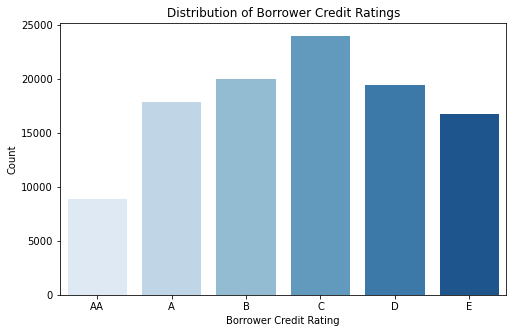

In [93]:
plt.figure(figsize = [8, 5])
sns.countplot(data = df, x = "ProsperRatingCombined", palette = "Blues")
plt.xlabel("Borrower Credit Rating")
plt.ylabel("Count")
plt.title("Distribution of Borrower Credit Ratings");

The distribution of credit ratings is skewed to the right which coincides with our observation of estimated return distribution also being skewed to the right

This could mean that for a particular credit rating we have a range of possible estimated returns, let's look into this further in our bivariate visualizations.

### Employment Status

As we want to look into the IncomeRange of borrowers, we wanted to check what their employment status is before looking into their income ranges.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Self-employed'),
  Text(1, 0, 'Not available'),
  Text(2, 0, 'Full-time'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Employed'),
  Text(5, 0, 'Not employed'),
  Text(6, 0, 'Part-time'),
  Text(7, 0, 'Retired')])

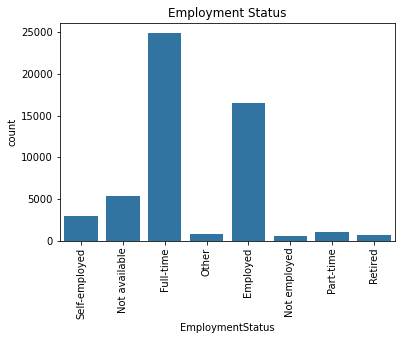

In [94]:
sns.countplot(data = target_df, x = "EmploymentStatus", color = base_color).set(title="Employment Status")
plt.xticks(rotation = 90)

Not surprisingly, the largest category of borrowers are employed and the largest sub-category of the employed status is full-time. Self-employed makes up the second largest sub-category of the employed status. The "other" category is most likely to be comprised of those falling into a "student" status.

### Income Range

Let's continue our exploration by looking at a couple of the underwriting features for borrowers to be assigned these Credit Ratings. We'll start with taking a look at Income Ranges.

In [95]:
df.IncomeRange.value_counts()

$25,000-49,999    32152
$50,000-74,999    31005
$100,000+         17321
$75,000-99,999    16899
Not displayed      7741
$1-24,999          7261
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

To simplify our visualization, let's combine the "Not employed", "Not displayed", and "$0" categories together.

In [96]:
df["IncomeRange"].replace(["Not employed", "Not displayed"], "$0", inplace = True)

In [97]:
#Create ordinal categories for income
ordinal_rating = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df["IncomeRange"] = df["IncomeRange"].astype(ordered_var)

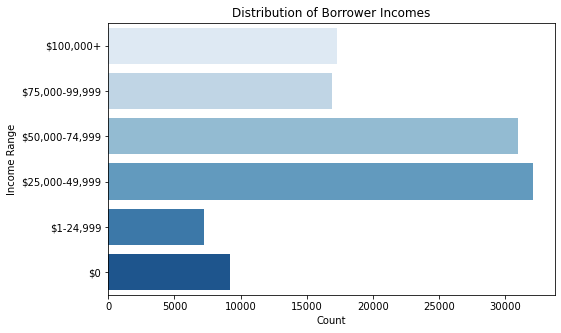

In [98]:
#Bar chart
plt.figure(figsize = [8, 5])
sns.countplot(data = df, y = "IncomeRange", palette = "Blues")
plt.ylabel("Income Range")
plt.xlabel("Count")
plt.title("Distribution of Borrower Incomes");

Its interesting to see that the number of borrowers for the 25k-49k range is the same as the 50k-74k range. The amount of borrowers in the 75k-100k range is the same as all borrowers that have an income of over 100k.

### Debt to Income Ratio

Let's see what the borrower's Debt to Income Ratio looks like.

In [99]:
df.DebtToIncomeRatio.describe()

count    105263.000000
mean          0.275976
std           0.551811
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

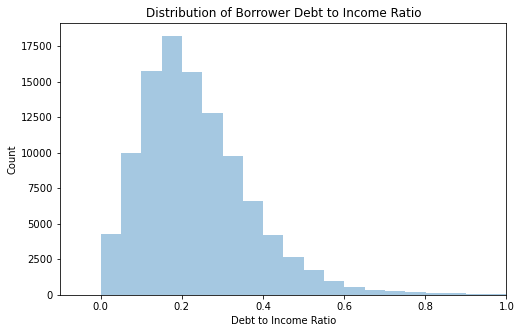

In [100]:
#Distribution plot
plt.figure(figsize = [8,5])
sns.distplot(df.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Count")
plt.title("Distribution of Borrower Debt to Income Ratio");

It appears that most borrowers who apply for a loan have a debt to income ratio around 20%.

### Discuss the distribution(s) of your variable(s) of interest: Were there any unusual points? Did you need to perform any transformations?

We saw relatively normal distributions for income, debt to income, credit ratings, and estimated returns. However, trying to calculate the real time actual returns proved to be difficult. We may want to revisit this feature if we are trying to answer a particular question about the data set. The majority of borrowers are employed and a majority of those are full-time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We saw that from our simplified actual returns formula, that the values returned vary greatly between different loan statuses.

To tidy up our visualizations, we combined several rows for different visuals where the categories appeared to be redundant. Such as the income ranges of "Not employed" and "Not displayed" are essentially equivalent to "$0". For Credit Ratings, Prosper developed their proprietary system after 2009 which resulted in many missing rows. We combined these features to get a complete Credit Rating feature. We also combined the "High Risk", "No Credit", and "E" categories together.

## Bivariate Exploration

First let's look at the pairwise correlation between the numeric features we're interested in and see if there is any actual relationship between them.

In [103]:
#Numeric and categorical variables
numeric_vars = ["DebtToIncomeRatio", "ActualReturns", "EstimatedReturn"]
categoric_vars = ["IncomeRange", "ProsperRatingCombined"]

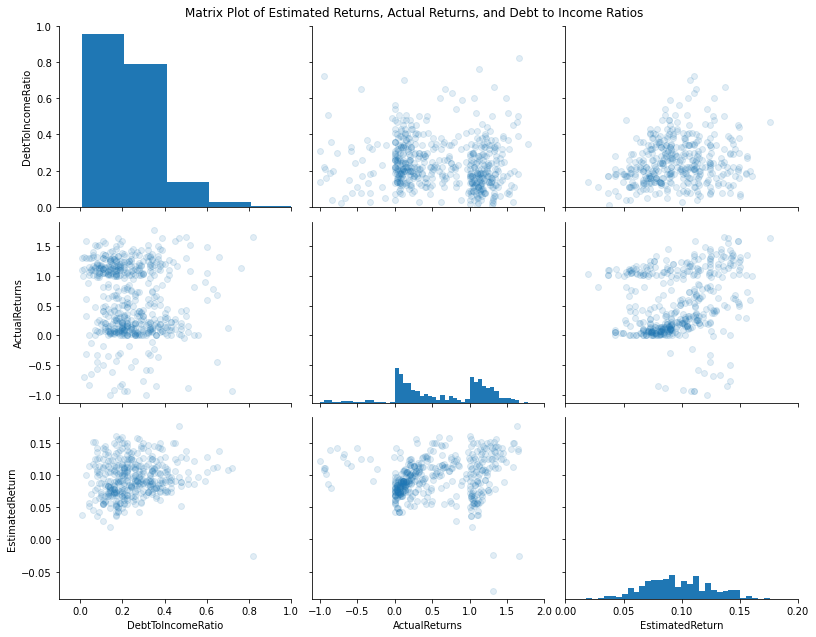

In [104]:
#Plot matrix with 0.5% of data points
samples = np.random.choice(df.shape[0], int(df.shape[0]*.005), replace = False)
df_samp = df.loc[samples,:]

#Pair grid
g = sns.PairGrid(data = df_samp, vars = numeric_vars, size = 3, aspect = 1.25)
g = g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter, alpha = 1/8)

#Set axis limits
g.axes[0,0].set_ylim(0,1)
g.axes[0,0].set_xlim(-.1,1)
g.axes[0,1].set_xlim(-1.1,2)
g.axes[0,2].set_xlim(0,.2)

g.fig.suptitle("Matrix Plot of Estimated Returns, Actual Returns, and Debt to Income Ratios")
g.fig.subplots_adjust(top = .95);

From the univariate exploration, we have a good undertanding regarding the range of values we can expect. By limiting the axis values, we are able to prevent outliers from skewing the plot. Otherwise, most of the points will appear to be grouped in a vertical line.

Surprisingly, there doesn't appear to be any correlation between the estimated returns and the actual returns we calculated. We may have to investigate further by querying select categories of loan status.

There doesn't appear to be a correlation between any of the other numeric variables either.

### Income Range and Credit Rating vs Estimated Returns

Let's take a look at how a borrower's income range and credit rating relates to the investor's estimated returns.

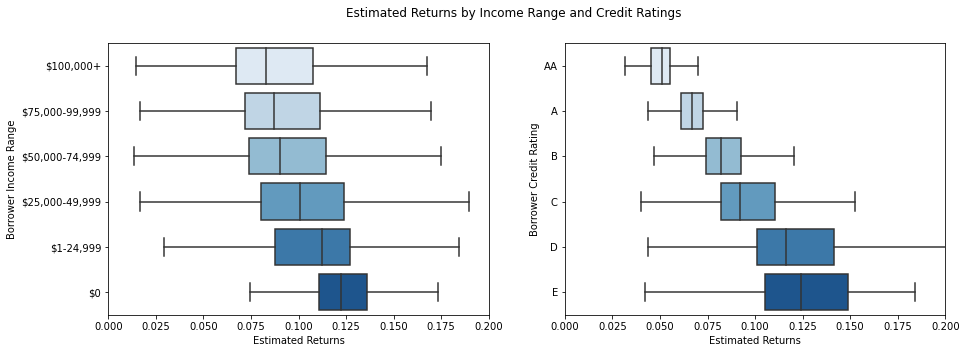

In [105]:
#Boxplots
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "IncomeRange", x = "EstimatedReturn", palette = "Blues", showfliers = False)
plt.xlim(0,.2)
plt.ylabel("Borrower Income Range")
plt.xlabel("Estimated Returns")

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "ProsperRatingCombined", x = "EstimatedReturn", palette = "Blues", showfliers = False)
plt.xlim(0,.2)
plt.ylabel("Borrower Credit Rating")
plt.xlabel("Estimated Returns")

plt.suptitle("Estimated Returns by Income Range and Credit Ratings");

From these boxplot, we're able to clearly see that as the borrowers income increases, the median estimated return decreases. The credit rating boxplot shows the trend more clearly, as a borrowers credit rating increases, the median estimated return greatly decreases.

Next let's plot the actual returns.

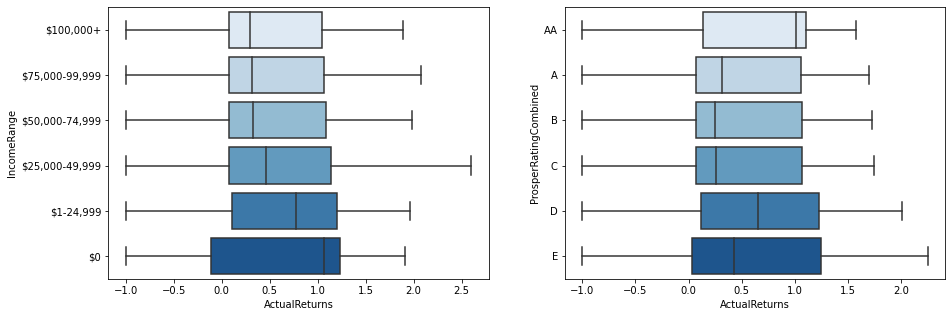

In [106]:
#Boxplots
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "IncomeRange", x = "ActualReturns", palette = "Blues", showfliers = False)

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "ProsperRatingCombined", x = "ActualReturns", palette = "Blues", showfliers = False);

This plot is quite interesting as it suggests that investing in borrowers with no reported income and the highest credit ratings will produce the highest returns.

### Credit Start with Listing Category

[Text(0.5, 1.0, 'Loan Status by Listing Category')]

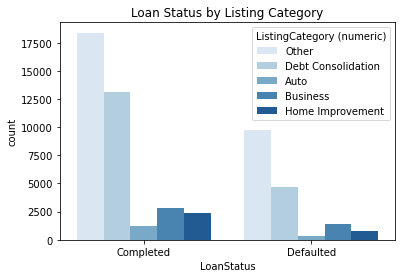

In [107]:
sns.countplot(data = target_df, x = "LoanStatus", hue = "ListingCategory (numeric)", palette = "Blues").set(title = "Loan Status by Listing Category")

Observation 2

- In both of the graphs, the debt consolidation is the most frequent in the defaulted and completed categories

### Credit Score VS Income Range

Let's plot the credit score along with the income range to see if there is any correlation there.

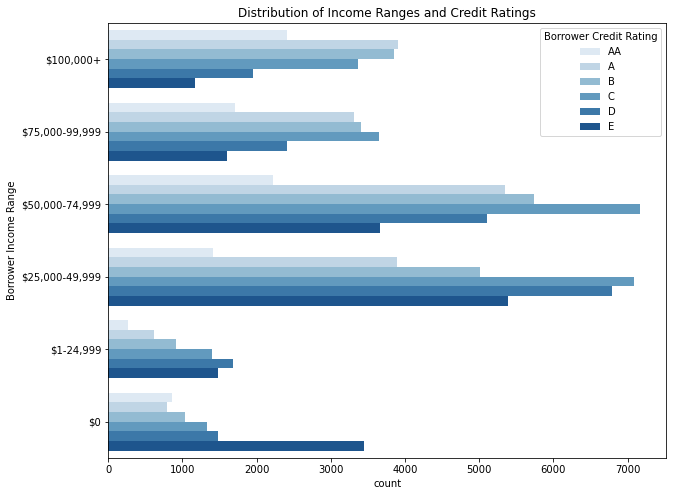

In [108]:
#Clustered bar chart
plt.figure(figsize = [10,8])

ax = sns.countplot(data = df, y = "IncomeRange", hue = "ProsperRatingCombined",
                   palette = 'Blues')

ax.legend(title = "Borrower Credit Rating")
plt.title("Distribution of Income Ranges and Credit Ratings")
plt.ylabel("Borrower Income Range");

From this clustered bar chart, we can see the trend of higher incomes correlate to a higher credit rating qualifying the borrower for the best (lowest) interest rates.

Having an income of $75k+ doesn't automatically guarantee the best credit ratings, which is curious to see. Perhaps we can see what other factors play a big role in determining one's credit rating later on.

Conversely, it also appears that in the 0 income range, there are a high amount of "AA" loans relative to the 1k-25k income range.

### Prosper Rating and Employment Status

Let's see if there is a relationship between the Prosper Rating and the Employment Status.

[Text(0.5, 1.0, 'Loan Rating vs Employment Status')]

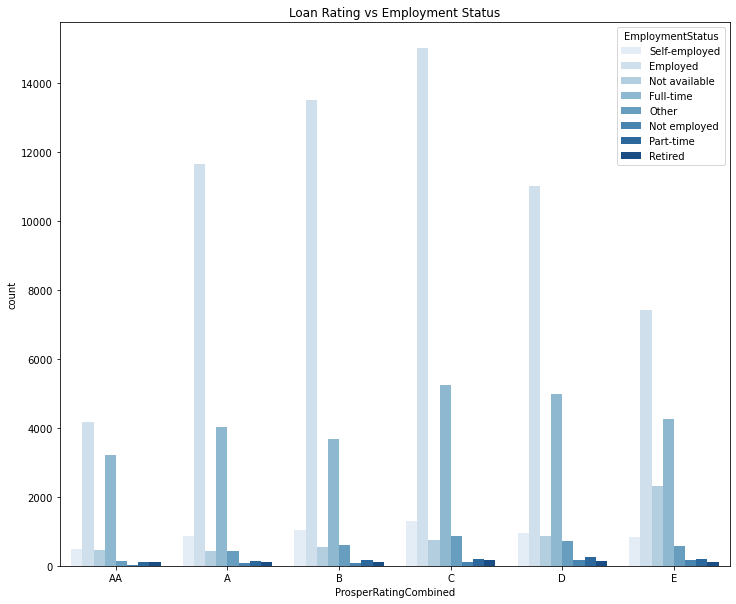

In [109]:
plt.figure(figsize = [12, 10])
sns.countplot(data = df, x = "ProsperRatingCombined", hue = "EmploymentStatus", palette = "Blues").set(title = "Loan Rating vs Employment Status")

Lower ratings seem to have greater proportions of individuals who selected the "Not Employed", "Self-Employed", "Retired", and "Part-Time" employment categories/sub-categories

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From our matrix plot, our numerical features of interest did not reveal any correlation. It was surprising to see that there was no correlation between debt to income ratios, estimated returns, and actual returns.

From our box plots, we saw a trend of median estimated returns decrease as the borrowers income range increased. This makes intuitive sense as borrowers with a higher income can demand the most competetive rates from creditors. The overlap in our boxplot suggests that borrowers in any income range (except 0) can produce the same estimated return for an investor. The trend between lower estimated returns and higher credit ratings was much more apparent with narrowing quartiles and lower medians.

The box plot for the actual returns revealed additional tweaking or grouping will be necessary to produce any insights.

From our clustered bar chart, we peeled back another layer to look at credit ratings and income ranges. This revealed that the previous trend of high income equating to better credit ratings, however there are some interesting cases where a high number of borrowers with no income qualified for the highest credit ratings. Also, we saw that borrowers with incomes of greater than 75k can still be considered "High Risk" borrowers. 

EmploymentStatus of indiviuals with lower rated loans seemed to have selected the "Not Employed", "Self-Employed", "Retired", or "Part-Time" employment categories/sub-categories.


## Multivariate Exploration

The main thing we want to explore in the multivariate exploration is the relationship between income ranges, credit scores, and estimated returns, but we may also compare other data points that come from questions pertaining to this portion of the exploration.


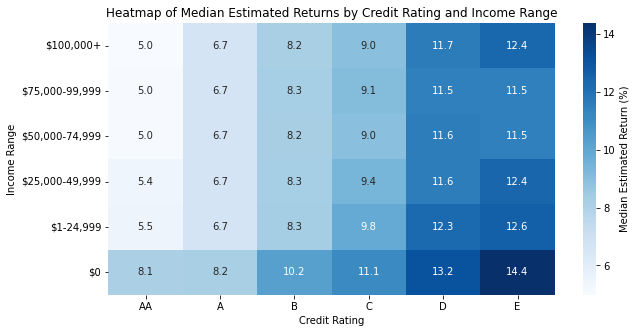

In [110]:
#Create a heat map of average estimated returnsb
plt.figure(figsize = [10,5])

cat_med = df.groupby(["ProsperRatingCombined", "IncomeRange"]).median()["EstimatedReturn"]*100
cat_med = cat_med.reset_index(name = "EstimatedReturnMedian")
cat_med = cat_med.pivot(index = "IncomeRange", columns = "ProsperRatingCombined", values = "EstimatedReturnMedian")

sns.heatmap(cat_med, annot = True, fmt = ".1f", cmap = "Blues", cbar_kws = {"label" : "Median Estimated Return (%)"})
plt.xlabel("Credit Rating")
plt.ylabel("Income Range")
plt.title("Heatmap of Median Estimated Returns by Credit Rating and Income Range");

From the heat map we continue to see the trend of lower credit ratings, and lower incomes equate to higher returns. It's interesting to see that the income range does not play a big influence on the estimated returns by credit rating category.

Across the credit ratings "AA", "A", and "B", we observe no difference in the rate of return for income ranges 1k-100k+. However, there is a definite jump in returns for the 0 income range across all credit rating categories.

Across the credit ratings "C", "D", and "E", we notice a bit more variability however the median return is still within +- 1% (except the 0 category).

### Relationships between Credit Category, Credit Rating, and Loan Outcome

Let's see if there is a relationship between the credit category, rating, and the outcome.

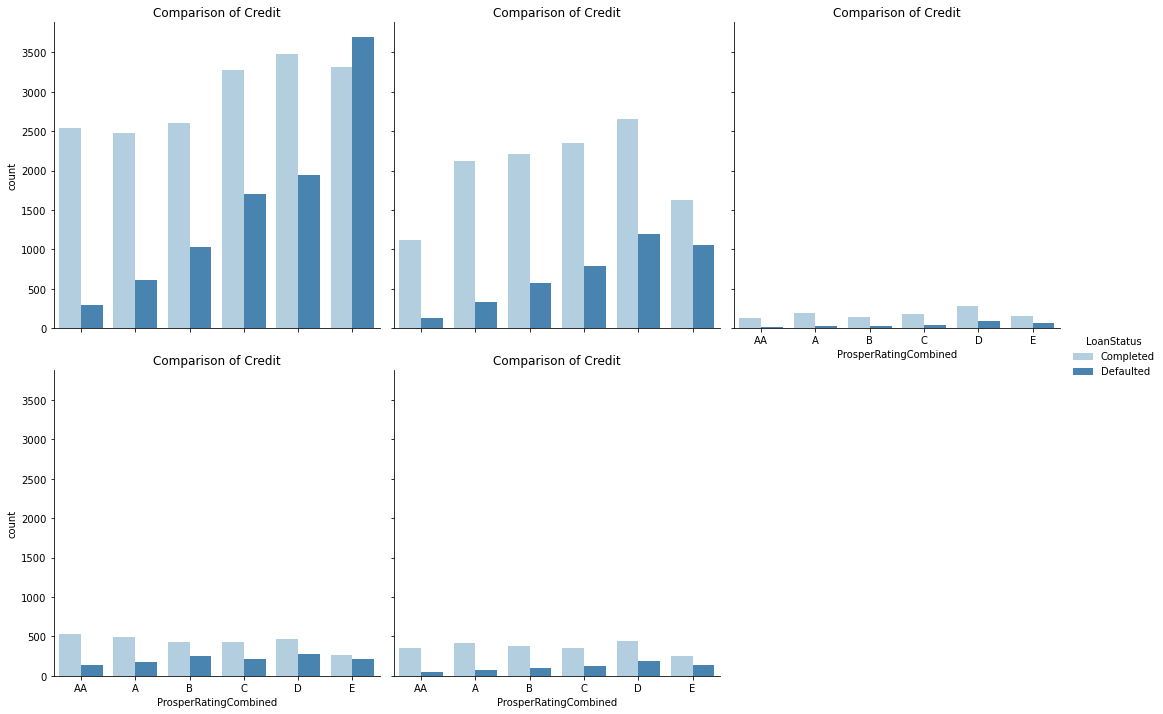

In [111]:
sns.catplot(x = "ProsperRatingCombined", hue = "LoanStatus", col = "ListingCategory (numeric)", 
            data = target_df, kind = "count", palette = "Blues", col_wrap = 3).set(title = "Comparison of Credit")

There is no substantial difference for defaulted laons in different categories when broken up by the ratings.

## Amount, Listing Category Loan, and Loan Status Impact

[Text(0.5, 1.0, 'Comparison of Loan Categories and Statuses')]

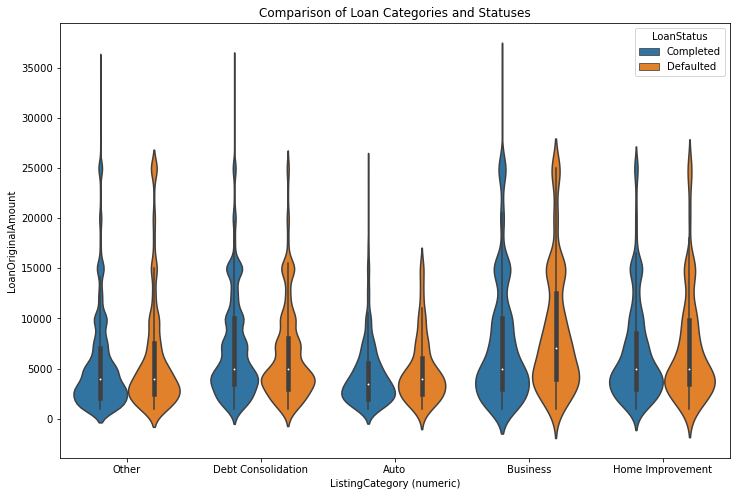

In [112]:
plt.figure(figsize = [12, 8])
sns.violinplot(data = target_df, x = "ListingCategory (numeric)", y = "LoanOriginalAmount", hue = "LoanStatus").set(title = "Comparison of Loan Categories and Statuses")

Except for Auto, the Business and Home Improvement categories don't have equal means between the loan statuses. The business category seems to have a larger amount of loans distributed and Debt Consolidation loans come in second to the Business category.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest Were there any interesting or surprising interactions between features?

Our initial assumptions were strengthed. Most of the defaulted loans comes from individuals with low Prosper ratings and
the Business category had the largest amount of loans. We simplified the plots a bit by only looking at three loan statuses: Completed, Current, and Defaulted.

For loans that are defaulted, there doesn't appear to be any correlation between the predicted estimated return and the actual return of the loan.

For loans that are current, there appears to be a linear relationship between the estimated and actual returns! Recall that during our bivariate exploration we were unable to see the trend as all of the loan status were lumped together.

It was interesting to find that defaulted loans for individuals with high Prosper ratings tended to be larger than completed loans.